In [1]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from tbparse import SummaryReader

In [2]:
log_dir = str(os.path.abspath(os.path.join(str(Path.home()), 'forl-exp/Matrix_Game_PrisonerDilemma')))
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars

In [3]:
df['tag'].unique().tolist()

['ray/tune/agent_timesteps_total',
 'ray/tune/connector_metrics/ObsPreprocessorConnector_ms',
 'ray/tune/connector_metrics/StateBufferConnector_ms',
 'ray/tune/connector_metrics/ViewRequirementAgentConnector_ms',
 'ray/tune/counters/num_agent_steps_sampled',
 'ray/tune/counters/num_agent_steps_trained',
 'ray/tune/counters/num_env_steps_sampled',
 'ray/tune/counters/num_env_steps_trained',
 'ray/tune/done',
 'ray/tune/episode_len_mean',
 'ray/tune/episode_reward_max',
 'ray/tune/episode_reward_mean',
 'ray/tune/episode_reward_min',
 'ray/tune/episodes_this_iter',
 'ray/tune/episodes_total',
 'ray/tune/info/learner/agent_0/diff_num_grad_updates_vs_sampler_policy',
 'ray/tune/info/learner/agent_0/learner_stats/amd_loss',
 'ray/tune/info/learner/agent_0/learner_stats/cooperativeness',
 'ray/tune/info/learner/agent_0/learner_stats/cur_kl_coeff',
 'ray/tune/info/learner/agent_0/learner_stats/cur_lr',
 'ray/tune/info/learner/agent_0/learner_stats/entropy',
 'ray/tune/info/learner/agent_0/lea

In [4]:
df['dir_name'].unique().tolist()

['no_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_283a7_00000_0_2023-06-08_19-59-04',
 'no_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_32385_00000_0_2023-06-08_19-59-21',
 'no_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_58c90_00000_0_2023-06-08_20-00-26',
 'no_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_6494d_00000_0_2023-06-08_20-00-46',
 'with_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_0f299_00000_0_2023-06-08_19-58-22',
 'with_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_18bd1_00000_0_2023-06-08_19-58-38',
 'with_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_3bce7_00000_0_2023-06-08_19-59-37',
 'with_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_47c46_00000_0_2023-06-08_19-59-57']

In [5]:
df['trials'] = df['dir_name'].apply({
    'no_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_283a7_00000_0_2023-06-08_19-59-04': 'PPO + linear + neural',
    'no_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_32385_00000_0_2023-06-08_19-59-21': 'PPO + linear + softmax',
    'no_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_58c90_00000_0_2023-06-08_20-00-26': 'PPO + MLP + neural',
    'no_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_6494d_00000_0_2023-06-08_20-00-46': 'PPO + MLP + softmax',
    'with_amd_linear_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_0f299_00000_0_2023-06-08_19-58-22': 'AMDPPO + linear + neural',
    'with_amd_linear_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_18bd1_00000_0_2023-06-08_19-58-38': 'AMDPPO + linear + softmax',
    'with_amd_mlp_model_neural_assump/AMDPPO_Matrix_Game_PrisonerDilemma_3bce7_00000_0_2023-06-08_19-59-37': 'AMDPPO + MLP + neural',
    'with_amd_mlp_model_softmax_assump/AMDPPO_Matrix_Game_PrisonerDilemma_47c46_00000_0_2023-06-08_19-59-57': 'AMDPPO + MLP + softmax',
}.get)

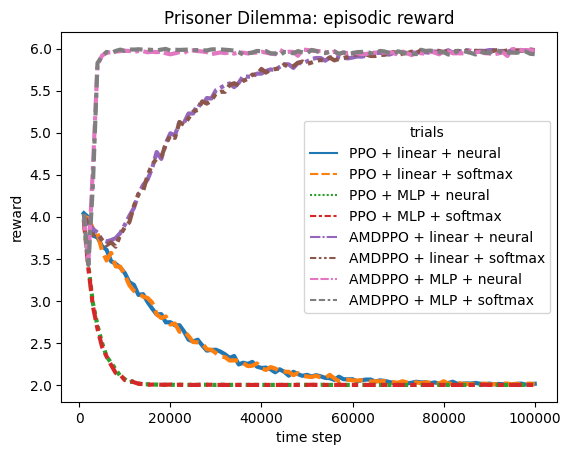

In [6]:
new_df = df[df['tag'] == 'ray/tune/episode_reward_mean']
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=3,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Prisoner Dilemma: episodic reward')
plt.savefig('./PD_reward.pdf')

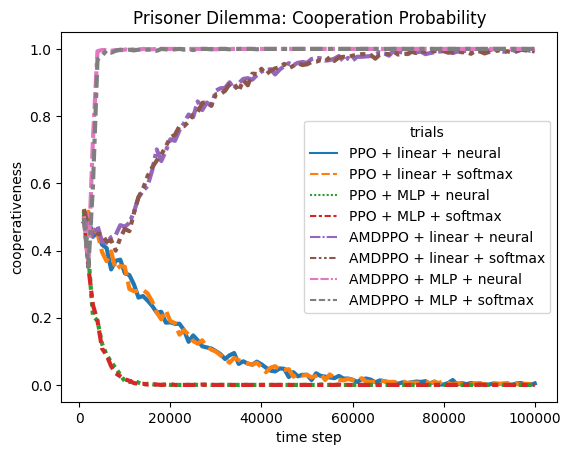

In [7]:
new_df = df[df['tag'] == 'ray/tune/info/learner/agent_0/learner_stats/cooperativeness']
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    linewidth=3,
    legend='full',
    style='trials',
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='cooperativeness', title='Prisoner Dilemma: Cooperation Probability')
plt.savefig('./PD_cooperativeness.pdf')

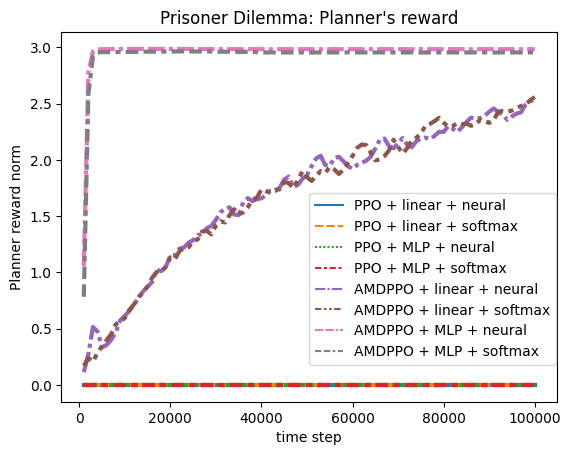

In [15]:
new_df = df[df['tag'] == 'ray/tune/info/learner/central_planner/learner_stats/planner_reward_cost']
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    linewidth=3,
    legend='full',
    style='trials',
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='Planner reward norm', title="Prisoner Dilemma: Planner's reward")
g.legend(loc=(0.5,0.1))
plt.savefig('./PD_cp_reward.pdf')